# House Prices - Advanced Regression Techniques
## Dataset Overview
The dataset contains1460 instances of training data and 1459 instances of test data. The total number of attributes is 81, with 36 being quantitative and 43 being categorical + Id and SalePrice.
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
df_train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

## Data Overview

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train.shape

(1460, 81)

In [7]:
df_test.shape

(1459, 80)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Exploratory Data Analysis

### Handling Missing Values

In [12]:
#Null Values In Train Set

null_percentage = round(df_train.isnull().mean() * 100)

filtered_null_percentage = null_percentage[null_percentage > 0]

filtered_null_percentage = filtered_null_percentage.astype(int).astype(str) + ' '+'%'

filtered_null_percentage

LotFrontage      18 %
Alley            94 %
MasVnrType       60 %
MasVnrArea        1 %
BsmtQual          3 %
BsmtCond          3 %
BsmtExposure      3 %
BsmtFinType1      3 %
BsmtFinType2      3 %
FireplaceQu      47 %
GarageType        6 %
GarageYrBlt       6 %
GarageFinish      6 %
GarageQual        6 %
GarageCond        6 %
PoolQC          100 %
Fence            81 %
MiscFeature      96 %
dtype: object

In [13]:
#Null Values In Test Set

null_percentage = round(df_test.isnull().mean() * 100)

filtered_null_percentage = null_percentage[null_percentage > 0]

filtered_null_percentage = filtered_null_percentage.astype(int).astype(str) + ' '+'%'

filtered_null_percentage

LotFrontage      16 %
Alley            93 %
MasVnrType       61 %
MasVnrArea        1 %
BsmtQual          3 %
BsmtCond          3 %
BsmtExposure      3 %
BsmtFinType1      3 %
BsmtFinType2      3 %
FireplaceQu      50 %
GarageType        5 %
GarageYrBlt       5 %
GarageFinish      5 %
GarageQual        5 %
GarageCond        5 %
PoolQC          100 %
Fence            80 %
MiscFeature      97 %
dtype: object

In [14]:
#Dropping the columns who have a high percentage of missing values
df_train.drop(['Id','PoolQC','MiscFeature','Alley'], axis=1, inplace=True)
df_test.drop(['PoolQC','MiscFeature','Alley'], axis=1, inplace=True)

In [15]:
# Filling in the missing values for the trains et
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median())
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())
df_train['BsmtQual'] = df_train['BsmtQual'].fillna("No Basment")
df_train['BsmtCond'] = df_train['BsmtCond'].fillna("No Basment")
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna("No Basment")
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna("No Basment")
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna("No Basment")
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna("No Fireplace")
df_train['GarageType'] = df_train['GarageType'].fillna("No Garage")
df_train['GarageFinish'] = df_train['GarageFinish'].fillna("No Garage")
df_train['GarageQual'] = df_train['GarageQual'].fillna("No Garage")
df_train['GarageCond'] = df_train['GarageCond'].fillna("No Garage")
df_train['Fence'] = df_train['Fence'].fillna("No Fence")
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [16]:
#Filling in the missing values for the test set
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].median())
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].median())
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].median())
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].median())
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].median())
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean())
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mean())
df_test['BsmtQual'] = df_test['BsmtQual'].fillna("No Basment")
df_test['BsmtCond'] = df_test['BsmtCond'].fillna("No Basment")
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna("No Basment")
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna("No Basment")
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna("No Basment")
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna("No Fireplace")
df_test['GarageType'] = df_test['GarageType'].fillna("No Garage")
df_test['GarageFinish'] = df_test['GarageFinish'].fillna("No Garage")
df_test['GarageQual'] = df_test['GarageQual'].fillna("No Garage")
df_test['GarageCond'] = df_test['GarageCond'].fillna("No Garage")
df_test['Fence'] = df_test['Fence'].fillna("No Fence")
df_test['MSZoning'] = df_test['MSZoning'].fillna("No Mszone")
df_test['Exterior1st'] = df_test['Exterior1st'].fillna("No Ext")
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna("No Ext")
df_test['Utilities'] = df_test['Utilities'].fillna("No utilities")
df_test['Functional'] = df_test['Functional'].fillna("No Functional")
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna("No fireplace")
df_test['Electrical'] = df_test['Electrical'].fillna(df_train['Electrical'].mode()[0])
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])

### Data Visualization

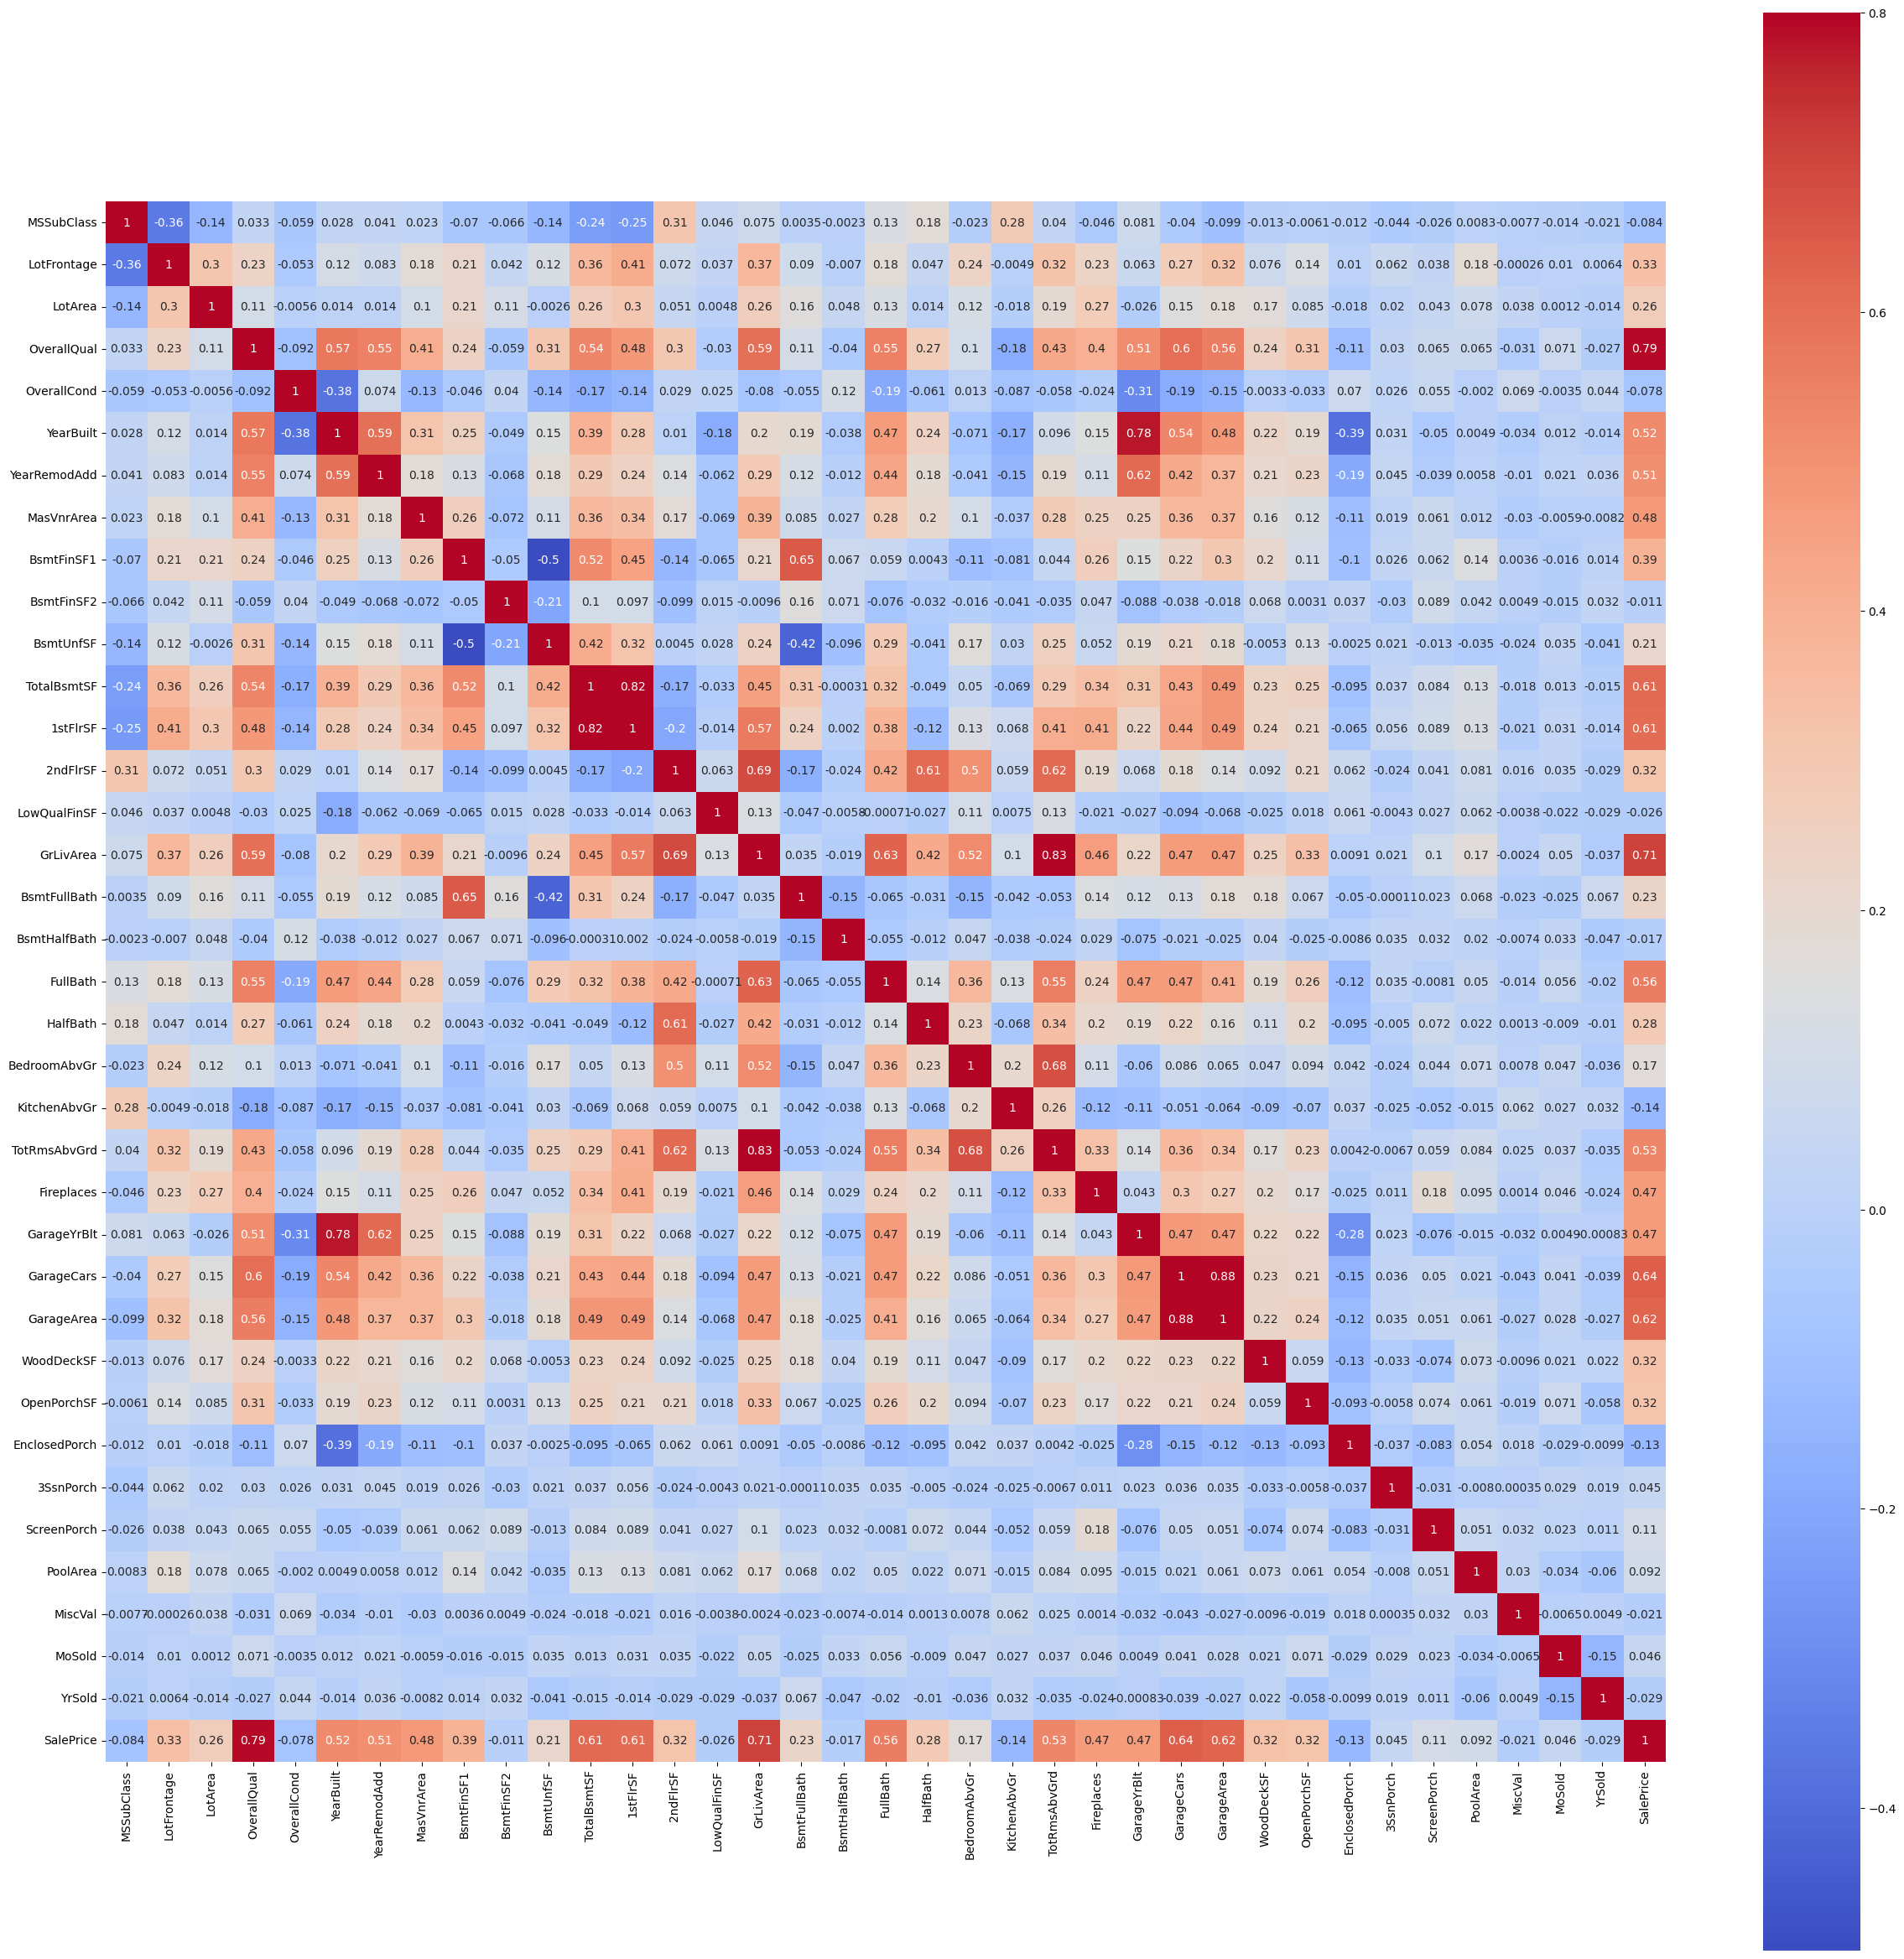

In [17]:
#Correlation Matrix
plt.figure(figsize=(30,30))
sns.heatmap(df_train.select_dtypes('number').corr(),vmax=.8, annot=True,square=True,cmap='coolwarm');

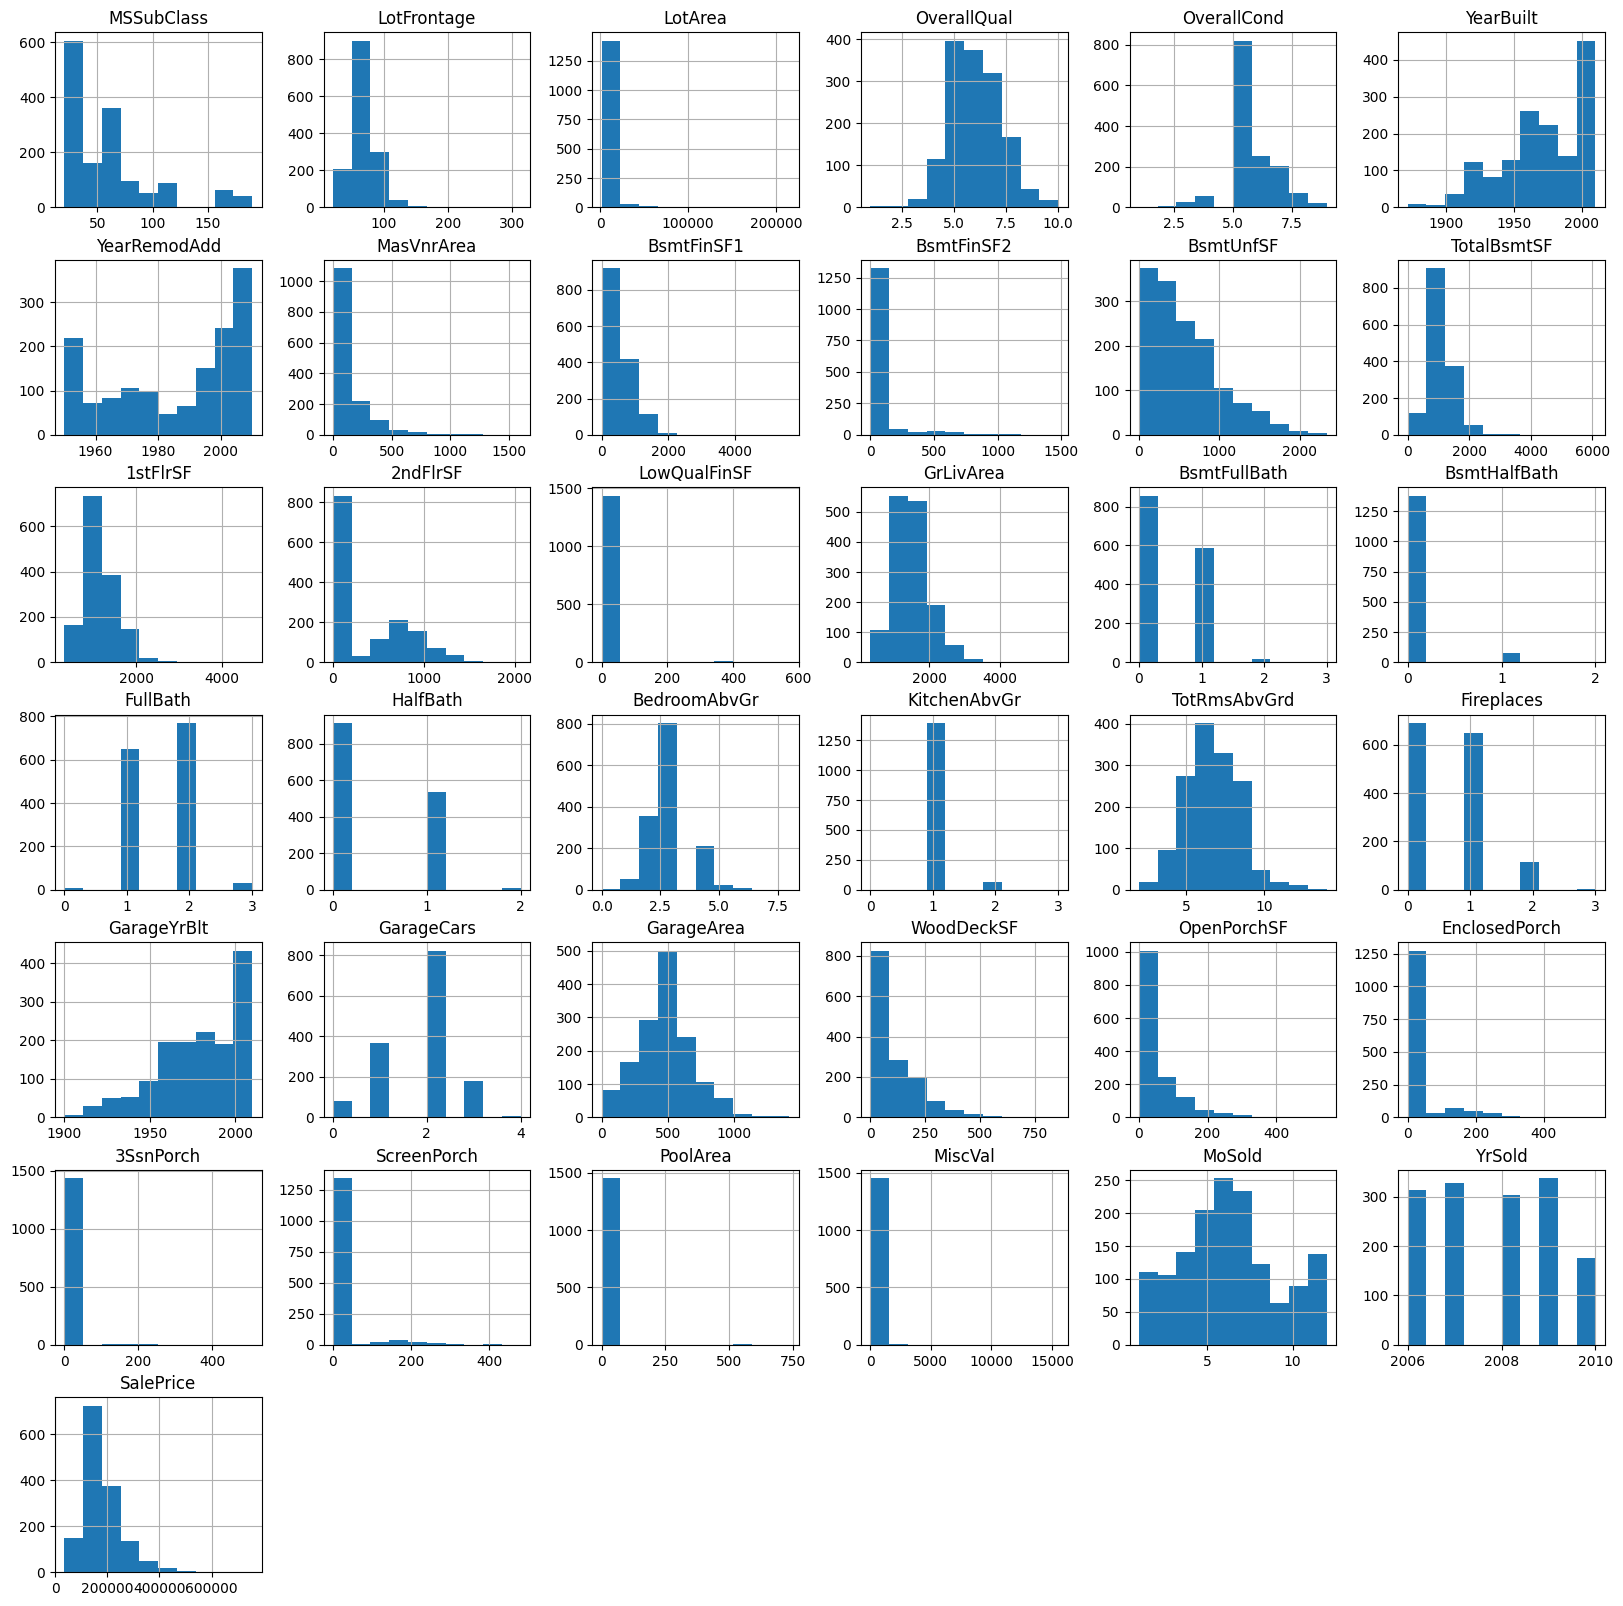

In [18]:
#Histograms for the numerical data
df_train.hist(figsize=(20, 20), xlabelsize=10, ylabelsize=10);

### Label Encoding The Non-Numerical Data

In [19]:
#Label Encoding For The Train Dataset
for column in df_train.columns:
    if df_train[column].dtypes == 'object':
        le = LabelEncoder()
        df_train[column] = le.fit_transform(df_train[column])

In [20]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,4,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,4,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,4,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,4,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,4,0,12,2008,8,4,250000


In [21]:
#Label Encoding For The Test Dataset
for column in df_test.columns:
    if df_test[column].dtypes == 'object':
        le = LabelEncoder()
        df_test[column] = le.fit_transform(df_test[column])

In [22]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,11,13,1,0.0,3,4,1,4,4,3,5,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,7,0,3,1,1961.0,3,1.0,730.0,4,5,2,140,0,0,0,120,0,2,0,6,2010,8,4
1,1462,20,4,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,12,14,1,108.0,3,4,1,4,4,3,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,7,0,3,1,1958.0,3,1.0,312.0,4,5,2,393,36,0,0,0,0,4,12500,6,2010,8,4
2,1463,60,4,74.0,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,11,13,1,0.0,3,4,2,2,4,3,2,791.0,6,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,7,1,5,1,1997.0,0,2.0,482.0,4,5,2,212,34,0,0,0,0,2,0,3,2010,8,4
3,1464,60,4,78.0,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,11,13,1,20.0,3,4,2,4,4,3,2,602.0,6,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,7,1,2,1,1998.0,0,2.0,470.0,4,5,2,360,36,0,0,0,0,4,0,6,2010,8,4
4,1465,120,4,43.0,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,1,0.0,2,4,2,2,4,3,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,7,0,3,1,1992.0,2,2.0,506.0,4,5,2,0,82,0,0,144,0,4,0,1,2010,8,4


### Standard Normalization

In [23]:
#Standard Normalization For The Train Dataset
from sklearn.preprocessing import StandardScaler
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('SalePrice', errors='ignore')
scaler = StandardScaler()
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])

In [24]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.073375,-0.045532,-0.220875,-0.207142,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,1.050994,0.878668,-0.491516,-0.125797,0.743092,0.751626,-1.364257,0.511418,-0.777976,0.364207,0.835599,-0.566939,0.325405,0.591905,-0.510942,0.575425,0.344051,-0.288653,-0.944591,-0.459303,-0.123046,-0.884658,0.263813,0.302403,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,0.912210,0.255978,-0.951226,-0.075117,-0.768736,1.017598,0.103495,0.311725,0.351000,0.315602,0.295349,0.289745,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,0.457447,-0.087688,-1.599111,0.138777,0.313867,0.208502,208500
1,-0.872563,-0.045532,0.460320,-0.091886,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,-0.411691,-0.543457,-0.071836,2.179628,0.156734,-0.429577,-0.491516,-0.125797,-0.508251,-0.661060,0.780940,-0.574410,0.663451,0.364207,-0.549162,-0.566939,0.325405,-1.124444,-1.399536,1.171992,0.344051,-0.288653,-0.641228,0.466465,-0.123046,-0.884658,0.263813,0.302403,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,0.795629,-0.318683,0.255978,0.600495,1.638498,-0.768736,-0.107927,0.103495,0.311725,-0.060731,0.315602,0.295349,0.289745,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,0.457447,-0.087688,-0.489110,-0.614439,0.313867,0.208502,181500
2,0.073375,-0.045532,-0.084636,0.073480,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,0.984752,0.830215,-0.491516,-0.125797,0.743092,0.751626,-1.364257,0.323060,-0.777976,0.364207,0.835599,-0.566939,0.325405,-0.266269,-0.510942,0.092907,0.344051,-0.288653,-0.301643,-0.313369,-0.123046,-0.884658,0.263813,0.302403,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,-0.318683,0.255978,0.600495,1.638498,-0.768736,0.934226,0.103495,0.311725,0.631726,0.315602,0.295349,0.289745,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,0.457447,-0.087688,0.990891,0.138777,0.313867,0.208502,223500
3,0.309859,-0.045532,-0.447940,-0.096897,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,-1.863632,-0.720298,-0.491516,-0.125797,1.055928,1.316701,0.780940,-0.574410,0.663451,0.364207,-1.933923,0.997770,-2.834848,0.591905,-1.399536,-0.499274,0.344051,-0.288653,-0.061670,-0.687324,-0.123046,0.265476,0.263813,0.302403,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-0.409369,0.296763,0.255978,0.600495,-0.931925,1.301075,0.809167,0.942959,1.650307,0.790804,0.315602,0.295349,0.289745,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,0.457447,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,140000
4,0.073375,-0.045532,0.641972,0.375148,0.064238,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,0.457215,-0.036289,-0.03174,-0.411691,1.026689,1.374795,-0.517200,0.951632,0.733308,-0.491516,-0.125797,0.743092,0.751626,-1.364257,1.364570,-0.777976,0.36

In [25]:
y = df_train['SalePrice']
scaler_y = StandardScaler()

In [26]:
#Standard Normalization For The Test Dataset
numeric_columns = df_test.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('Id', errors='ignore')
df_test[numeric_columns] = scaler.fit_transform(df_test[numeric_columns])

In [27]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,-0.874711,-1.071528,0.567330,0.363929,0.06426,0.742620,0.31870,-0.03705,0.572445,-0.207992,-0.105672,-1.193183,0.028691,-0.426625,-0.431830,-0.751101,0.400766,-0.340945,-1.072885,-0.474315,-0.09948,0.721792,0.749936,-0.2625,-0.570108,0.673548,0.388852,-0.533007,1.008900,0.341573,0.576683,0.804294,0.063295,-1.873442,0.517348,-0.650619,-0.370808,-0.084379,1.415522,0.272716,0.296079,-0.654561,-0.775254,-0.080483,-1.215588,-0.818068,-0.25816,-1.028720,-0.751040,-1.029543,-0.20391,0.770002,-0.918335,0.264993,-0.898055,-0.049484,-0.766829,-0.653107,0.930000,-0.988189,1.185945,0.337786,0.29175,0.339114,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-1.348162,-0.092244,-0.038281,1.713905,0.32475,0.201383
1,1462,-0.874711,0.044360,0.615963,0.897861,0.06426,-1.384637,0.31870,-0.03705,-1.950811,-0.207992,-0.105672,-0.056113,0.028691,-0.426625,-0.431830,-0.054877,0.400766,-0.439695,-1.214908,2.006065,-0.09948,1.072239,1.030776,-0.2625,0.041273,0.673548,0.388852,-0.533007,1.008900,0.341573,0.576683,-1.449768,1.063392,0.363343,-0.297903,-0.339378,0.639144,-0.084379,1.415522,0.272716,0.296079,0.433298,-0.775254,-0.080483,-0.323539,-0.818068,-0.25816,-1.028720,1.237648,0.175997,-0.20391,-0.422602,-0.255371,0.264993,-0.898055,-0.049484,-0.766829,-0.769806,0.930000,-0.988189,-0.741213,0.337786,0.29175,0.339114,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,0.470579,19.730438,-0.038281,1.713905,0.32475,0.201383
2,1463,0.061351,0.044360,0.275532,0.809646,0.06426,-1.384637,0.31870,-0.03705,0.572445,-0.207992,-0.784114,-0.056113,0.028691,-0.426625,0.920188,-0.751101,-0.497418,0.844059,0.678742,-0.474315,-0.09948,0.721792,0.749936,-0.2625,-0.570108,0.673548,0.388852,0.833702,-0.514106,0.341573,0.576683,-0.548143,0.773254,0.363343,-0.297903,-0.954994,-0.266876,-0.084379,0.269754,0.272716,0.296079,-0.574165,0.891944,-0.080483,0.294508,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,0.770002,-0.255371,0.264993,0.647066,1.733149,-0.766829,0.747276,-1.543031,0.301406,0.042559,0.337786,0.29175,0.339114,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-1.348162,-0.092244,-1.140614,1.713905,0.32475,0.201383
3,1464,0.061351,0.044360,0.470064,0.032064,0.06426,-1.384637,0.31870,-0.03705,0.572445,-0.207992,-0.784114,-0.056113,0.028691,-0.426625,0.920188,-0.054877,0.400766,0.876976,0.678742,-0.474315,-0.09948,0.721792,0.749936,-0.2625,-0.456889,0.673548,0.388852,0.833702,1.008900,0.341573,0.576683,-0.548143,0.357829,0.363343,-0.297903,-0.527038,-0.271395,-0.084379,-0.876014,0.272716,0.296079,-0.579190,0.837243,-0.080483,0.243004,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,-0.422602,0.407593,0.264993,0.647066,-0.940800,-0.766829,0.786176,-1.543031,0.301406,-0.012766,0.337786,0.29175,0.339114,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,0.470579,-0.092244,-0.038281,1.713905,0.32475,0.201383
4,1465,1.465443,0.044360,-1.232092,-0.971808,0.06426,-1.384637,-2.53396,-0.03705,0.572445,-0.207992,1.590431,-0.056113,0.028691,2.866737,-0.431830,1.337571,-0.497418,0.679475,0.394694,-0.474315,-0.09948,-1.030445,-1.215950,-0.2625,-0.570108,-0.734340,0.388852,0.833702,-0.514106,0.341573,0.576683,-1.449

## Neural Network Model

In [28]:
#Splitting the data into X and Y
X = df_train.drop('SalePrice', axis=1).values
y = scaler_y.fit_transform(df_train['SalePrice'].to_numpy().reshape(-1,1))

In [29]:
#Splitting the data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Changing the train data into tensors
X_tensor_train = torch.tensor(X_train, dtype=torch.float32)
y_tensor_train = torch.tensor(y_train, dtype=torch.float32)

In [31]:
# Changing the validation data into tensors
X_tensor_val = torch.tensor(X_val, dtype=torch.float32)
y_tensor_val = torch.tensor(y_val, dtype=torch.float32)

In [32]:
# Changing the test data into a tensor
X_tensor_test = torch.tensor(df_test.drop('Id', axis=1).values, dtype=torch.float32)

In [33]:
#Training the model
def train(model, X_train, y_train, epochs, lr=0.001):
    criterion_mse = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        # Forward pass
        outputs = model(X_train)
        
        # Calculate mean squared error
        loss_mse = criterion_mse(outputs, y_train.view(-1, 1))

        # Calculate root mean squared error
        loss_rmse = torch.sqrt(loss_mse)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss_rmse.backward()
        optimizer.step()

        # Print the loss every few epochs
        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], RMSE: {loss_rmse.item()}')

    return model

In [34]:
#Defining the model
def model(input_size, hidden_sizes, output_size):
    layers = []
    
    # Input Layer
    layers.append(nn.Linear(input_size, hidden_sizes[0]))
    layers.append(nn.ReLU())
    
    # Hidden Layers
    for i in range(1, len(hidden_sizes)):
        layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
        layers.append(nn.ReLU())

    # Output Layer
    layers.append(nn.Linear(hidden_sizes[-1], output_size))
    
    model = nn.Sequential(*layers)
    return model

In [35]:
#Creating the model
input_size = X_tensor_train.shape[1]
hidden_sizes = [512, 256, 256, 128, 64 ]
output_size = 1
model = model(input_size, hidden_sizes, output_size)

In [36]:
# Training the model
epochs = 100
train_model = train(model, X_tensor_train, y_tensor_train, epochs=epochs)

Epoch [5/100], RMSE: 0.865821123123169
Epoch [10/100], RMSE: 0.5479633212089539
Epoch [15/100], RMSE: 0.43709442019462585
Epoch [20/100], RMSE: 0.37041476368904114
Epoch [25/100], RMSE: 0.3269091248512268
Epoch [30/100], RMSE: 0.2764529287815094
Epoch [35/100], RMSE: 0.23297929763793945
Epoch [40/100], RMSE: 0.2793867588043213
Epoch [45/100], RMSE: 0.21870803833007812
Epoch [50/100], RMSE: 0.17122408747673035
Epoch [55/100], RMSE: 0.15036332607269287
Epoch [60/100], RMSE: 0.14499516785144806
Epoch [65/100], RMSE: 0.12055489420890808
Epoch [70/100], RMSE: 0.10982649028301239
Epoch [75/100], RMSE: 0.11112629622220993
Epoch [80/100], RMSE: 0.10887286812067032
Epoch [85/100], RMSE: 0.08625967055559158
Epoch [90/100], RMSE: 0.08456330746412277
Epoch [95/100], RMSE: 0.07918249070644379
Epoch [100/100], RMSE: 0.12183870375156403


In [37]:
# RMSE ERROR
criterion = nn.MSELoss()

# Evaluating the model on training data
with torch.no_grad():
    val_predictions = model(X_tensor_val)
    val_loss = criterion(val_predictions, y_tensor_val.view(-1, 1))
    print(f'Loss with RMSE: {torch.sqrt(val_loss)}')

Loss with RMSE: 0.35703420639038086


In [38]:
#Prediction
with torch.no_grad():
    y_pred_tensor_test = model(X_tensor_test)

In [39]:
# Convert y_pred_tensor on numpy array
y_pred_test = y_pred_tensor_test.numpy()

In [40]:
#Returning the y into its original form before scaling
y_pred_original_scale = scaler_y.inverse_transform(y_pred_test)

In [41]:
# Creating a dataFrame for the predictions
submission_df = pd.DataFrame({'ID': df_test['Id'], 'SalePrice': y_pred_original_scale.reshape(-1)})

# Saving the dataFrame to a CSV file
submission_df.to_csv('/kaggle/working/submission.csv', index=False)

In [42]:
#Showing the predictions dataset
submission_df.head()

,ID,SalePrice
0,1461,126445.976562
1,1462,166151.343750
2,1463,193191.687500
3,1464,193340.046875
4,1465,197404.984375
